<a href="https://colab.research.google.com/github/Rajkdea123/Cimb/blob/main/2020BCS0172_Ravindra_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [5]:

store_sales = pd.read_csv('/content/1..csv')
temperature = pd.read_csv('/content/3.csv')
macro_economic = pd.read_csv('/content/2.csv')


In [6]:

print(store_sales.head())
print(store_sales.info())
print(store_sales.describe())

         date  day  month  year  day_of_week  open      sales  customers  \
0  01-01-2013    1      1  2013            2    16    94589.0    18866.0   
1  02-01-2013    2      1  2013            3   930  5884914.0   724219.0   
2  03-01-2013    3      1  2013            4   928  5397797.0   663772.0   
3  04-01-2013    4      1  2013            5   928  5625456.0   680237.0   
4  05-01-2013    5      1  2013            6   927  4972166.0   592567.0   

   promo  state_holiday  school_holiday  
0      0              1               1  
1      0              0               1  
2      0              0               1  
3      0              0               1  
4      0              0               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            942 non-null    object 
 1   day             942 non-null    int64  
 2   m

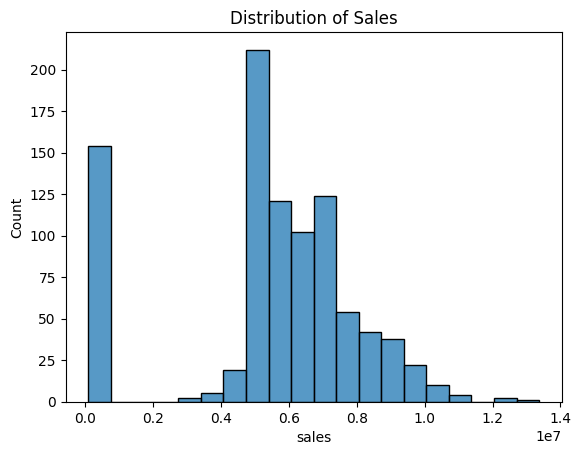

In [7]:
sns.histplot(store_sales['sales'], bins=20)
plt.title('Distribution of Sales')
plt.show()

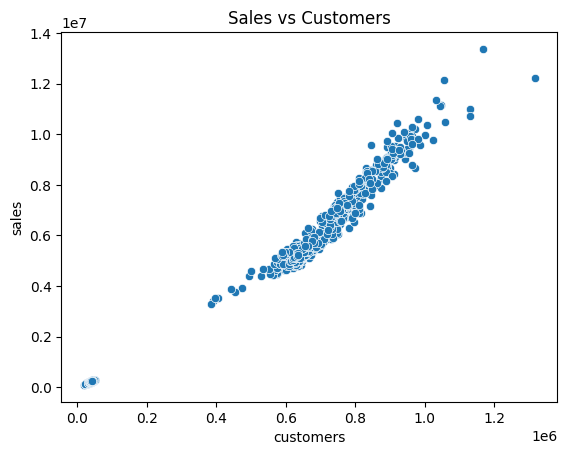

In [8]:
sns.scatterplot(x='customers', y='sales', data=store_sales)
plt.title('Sales vs Customers')
plt.show()

In [9]:
store_sales['sales_per_customer'] = store_sales['sales'] / store_sales['customers']

In [18]:
merged_data.fillna(merged_data.mean(), inplace=True)

<ipython-input-18-ba91d4cc5c89>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(merged_data.mean(), inplace=True)


In [133]:
z_scores = np.abs(stats.zscore(merged_data['sales']))
merged_data_no_outliers = merged_data[(z_scores < 3)]

In [134]:
merged_data = pd.merge(store_sales, temperature, on='month')
X = merged_data[['customers', 'promo', 'state_holiday', 'school_holiday', 'Avg_temp']]
y = merged_data['sales']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
feature_imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(feature_imputer.fit_transform(X_train), columns=X_train.columns)

In [137]:
target_imputer = SimpleImputer(strategy='mean')
y_train_imputed = pd.DataFrame(target_imputer.fit_transform(y_train.values.reshape(-1, 1)), columns=['sales'])

In [138]:
X_test_imputed = pd.DataFrame(feature_imputer.transform(X_test), columns=X_test.columns)
y_test_imputed = pd.DataFrame(target_imputer.transform(y_test.values.reshape(-1, 1)), columns=['sales'])

In [139]:
lr_model.fit(X_train_imputed, y_train_imputed)
y_pred = lr_model.predict(X_test_imputed)


In [140]:
print(np.isnan(y_pred).sum() if isinstance(y_pred, np.ndarray) else pd.Series(y_pred).isnull().sum())

0


In [142]:
y_test_no_nan = y_test.dropna()
y_pred_no_nan = y_pred[~np.isnan(y_test)]
print(' Mean Squared Error:', mean_squared_error(y_test_no_nan, y_pred_no_nan))
print(' R-squared:', r2_score(y_test_no_nan, y_pred_no_nan))


 Mean Squared Error: 135806174056.37314
 R-squared: 0.9811728215985107


In [57]:
input_data = pd.read_csv('/content/1..csv')


In [128]:
input_data_merged = pd.merge(input_data, temperature, on='month')


In [129]:
print("macro_economic columns:", macro_economic.columns)

macro_economic columns: Index(['Year', 'GDP(Trillions)', 'Income_per_Capita(Dollars)',
       'population(millions)', 'Inflation_rate(percentage)',
       'Inflation_change(percentage)'],
      dtype='object')


In [124]:
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(input_data_merged[feature_names_used])
predictions = lr_model.predict(X_test_imputed)
print('Predicted Sales for July 2015:')
print(predictions)


Predicted Sales for July 2015:
[[-1.41517480e+05]
 [ 6.24495058e+06]
 [ 5.70499483e+06]
 [ 5.85207197e+06]
 [ 5.06894095e+06]
 [ 1.14170688e+04]
 [ 8.75014313e+06]
 [ 7.53784881e+06]
 [ 6.81249459e+06]
 [ 7.10999862e+06]
 [ 7.32529489e+06]
 [ 5.08495549e+06]
 [ 9.11061027e+03]
 [ 5.42648887e+06]
 [ 5.08590236e+06]
 [ 4.89306293e+06]
 [ 5.11964122e+06]
 [ 5.50625800e+06]
 [ 4.92569413e+06]
 [ 1.03522575e+04]
 [ 7.34919701e+06]
 [ 7.21144563e+06]
 [ 6.87212757e+06]
 [ 6.82088059e+06]
 [ 7.09404298e+06]
 [ 4.81474983e+06]
 [ 3.03636490e+03]
 [ 5.46087088e+06]
 [ 5.00231002e+06]
 [ 5.13673843e+06]
 [ 5.99708382e+06]
 [ 6.17686395e+06]
 [ 5.43384975e+06]
 [ 1.80525866e+04]
 [ 8.53388064e+06]
 [ 7.57738351e+06]
 [ 7.22932926e+06]
 [ 6.87859518e+06]
 [ 7.20537172e+06]
 [ 5.13860570e+06]
 [ 2.51004978e+04]
 [ 4.88521140e+06]
 [ 5.28512900e+06]
 [ 5.64209811e+06]
 [ 5.80658510e+06]
 [ 5.56232004e+06]
 [ 5.12448308e+06]
 [ 3.24163904e+04]
 [ 8.69866241e+06]
 [ 6.94274993e+06]
 [ 6.97194204e+06]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
print(merged_data.columns)


Index(['date', 'day', 'month', 'year', 'day_of_week', 'open', 'sales',
       'customers', 'promo', 'state_holiday', 'school_holiday',
       'sales_per_customer', 'Avg_temp'],
      dtype='object')


In [121]:
condition_column = 'Avg_temp'
some_threshold = 25.0
condition = merged_data[condition_column] > some_threshold
group1 = merged_data[condition]
group2 = merged_data[~condition]
t_stat, p_value = stats.ttest_ind(group1['sales'], group2['sales'])
print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: nan
P-value: nan


Random Forest Mean Squared Error: 57957233688.86787


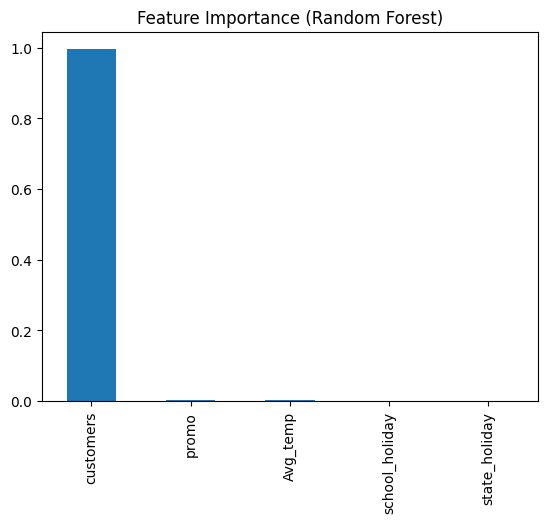

In [120]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imputed, y_train_imputed)
rf_y_pred = rf_model.predict(X_test_imputed)
print('Random Forest Mean Squared Error:', mean_squared_error(y_test_imputed, rf_y_pred))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.show()
